<a href="https://colab.research.google.com/github/logeshpalanivel/decisiontree_using_Lung_cancer_dataset/blob/main/T3_Lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [4]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [5]:
df.tail(10)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
299,M,65,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
300,F,63,2,2,2,2,2,2,2,2,1,2,2,2,2,YES
301,M,64,1,2,2,2,1,1,2,1,2,1,1,2,2,YES
302,F,65,2,2,2,2,1,2,1,2,1,2,2,2,1,YES
303,M,51,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
df.shape

(309, 16)

In [8]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


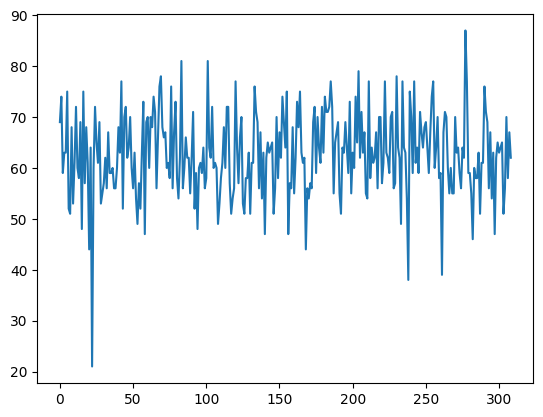

In [10]:
a=df["AGE"]
plt.plot(a)

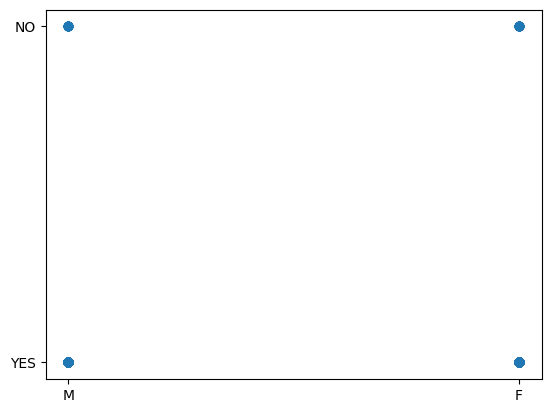

In [11]:
b=df["GENDER"]
c=df["LUNG_CANCER"]
plt.scatter(b,c)

<BarContainer object of 309 artists>

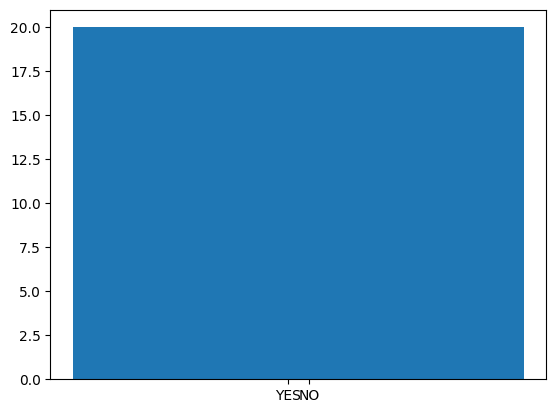

In [12]:
d=df["LUNG_CANCER"]
plt.bar(d,height=20,width=20)

(array([135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 174.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

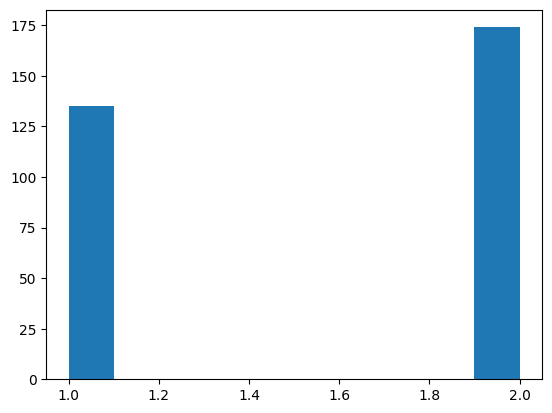

In [13]:
e=df["SMOKING"]
plt.hist(e)

([<matplotlib.patches.Wedge at 0x78865acb9c60>,
 [Text(1.099906151766137, 0.014368622307220611, ''),
  Text(1.0991554619742208, 0.04309606028672974, ''),
  Text(1.0976545947387943, 0.07179408505450521, ''),
  Text(1.09540457440699, 0.10044311010836522, ''),
  Text(1.0932263320299702, 0.12188595881518838, ''),
  Text(1.091540940514295, 0.13615570197816954, ''),
  Text(1.0886637272927246, 0.15751599562302313, ''),
  Text(1.0853685567217566, 0.1788158160782518, ''),
  Text(1.0829401959527343, 0.19297806090292668, ''),
  Text(1.0789513200983023, 0.21415893364072203, ''),
  Text(1.0745482156601747, 0.23525758695849786, ''),
  Text(1.069732573068384, 0.2562659207083431, ''),
  Text(1.0645062411336907, 0.2771758694176335, ''),
  Text(1.058871226337791, 0.2979794053855104, ''),
  Text(1.0507259060566896, 0.3255381242517514, ''),
  Text(1.044145980694993, 0.3460623802127175, ''),
  Text(1.0371651891378546, 0.3664537766767299, ''),
  Text(1.027238551648358, 0.3934221117418085, ''),
  Text(1.0193

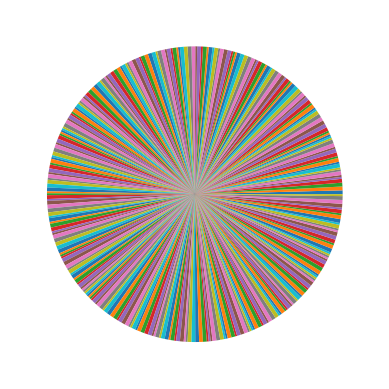

In [14]:
f=df["CHEST PAIN"]
plt.pie(f)

<Axes: ylabel='ALCOHOL CONSUMING'>

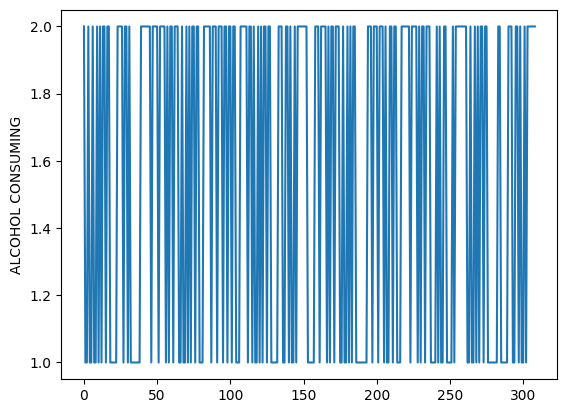

In [15]:
g=df['ALCOHOL CONSUMING']
sns.lineplot(g)

<Axes: xlabel='ANXIETY', ylabel='CHEST PAIN'>

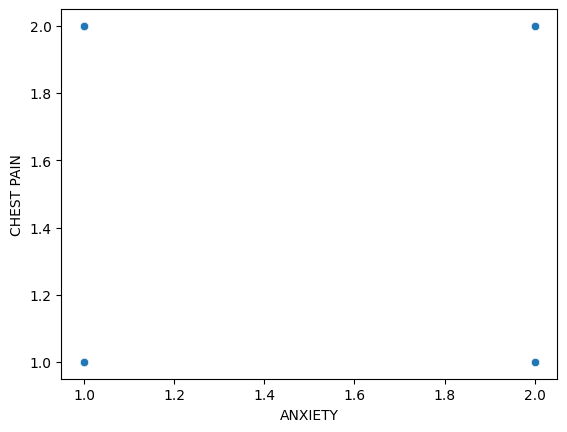

In [16]:
h=df['ANXIETY']
i=df['CHEST PAIN']
sns.scatterplot(x=h,y=i,data=df)

<Axes: ylabel='COUGHING'>

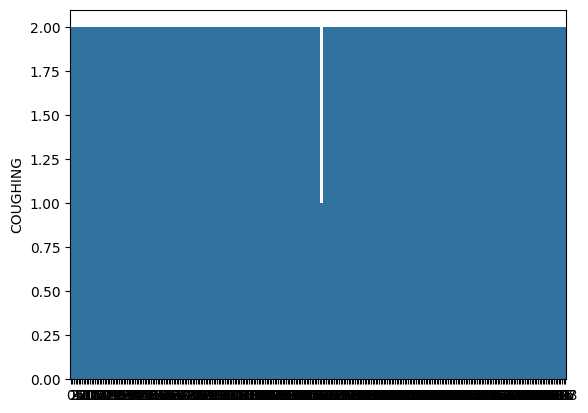

In [17]:
j=df['COUGHING']
sns.barplot(j,width=10)

<ipython-input-18-f054809f04aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,y)


<Axes: ylabel='Density'>

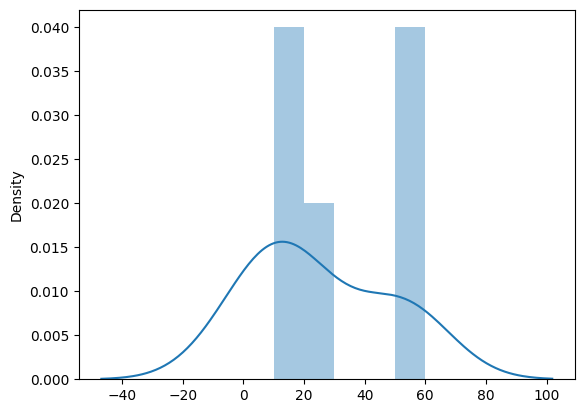

In [18]:
x=[10,50,0,20,15,55]
y=[10,20,30,40,50,60]
sns.distplot(x,y)

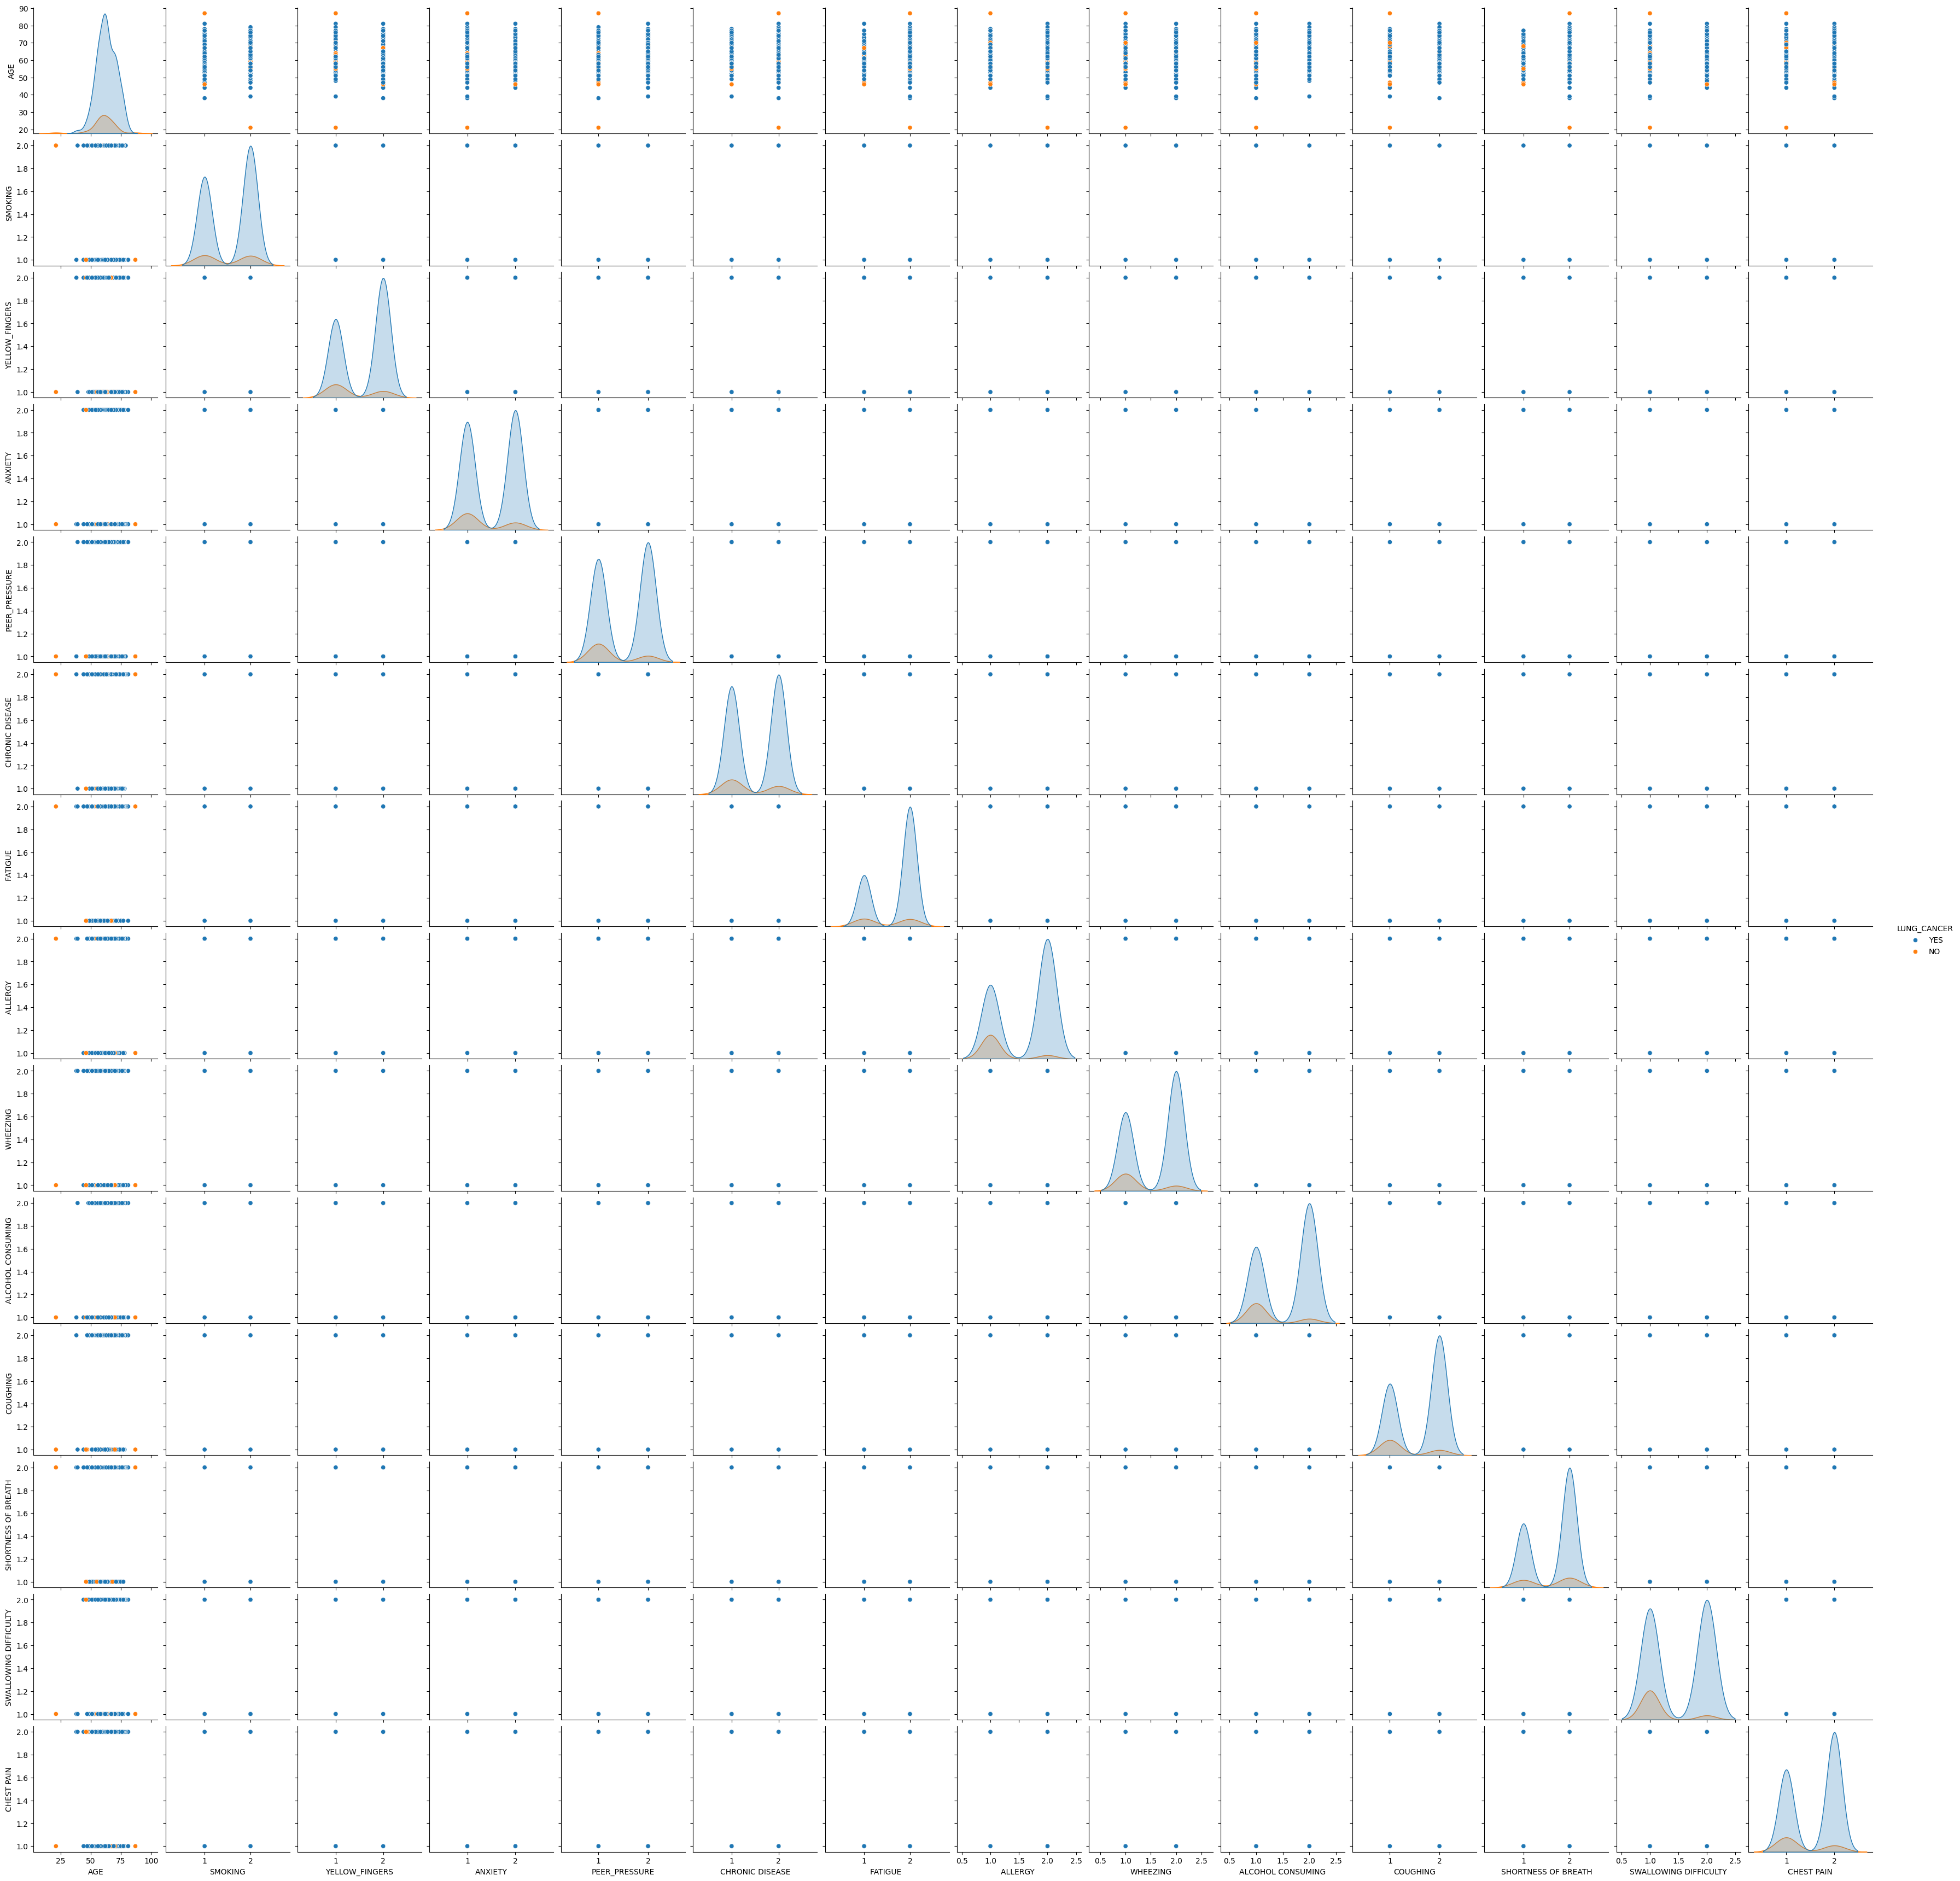

In [19]:
sns.pairplot(data=df,hue="LUNG_CANCER")

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

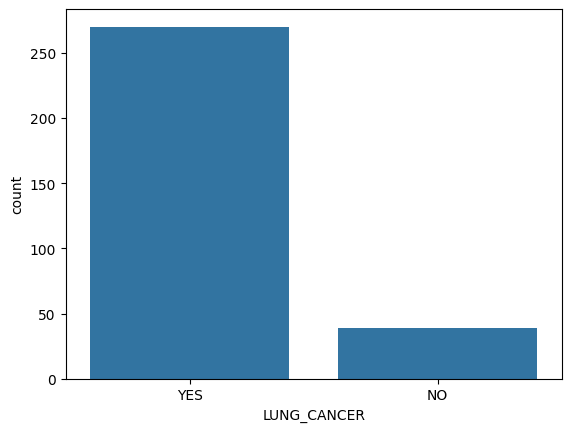

In [20]:
sns.countplot(data=df,x="LUNG_CANCER")

In [21]:
X=df.drop(["LUNG_CANCER","GENDER"],axis=1)
Y=df["LUNG_CANCER"]

In [22]:
X

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [23]:
Y

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [25]:
x_train.shape

(231, 14)

In [26]:
x_test.shape

(78, 14)

In [27]:
from sklearn.preprocessing import StandardScaler

In [44]:
c=StandardScaler()

TypeError: StandardScaler.__init__() got an unexpected keyword argument 'criterion'

In [29]:
x_train= c.fit_transform(x_train)

In [30]:
x_train

array([[-0.2500683 ,  0.91287093,  0.85081173, ...,  0.72787453,
         1.04880885, -1.12459143],
       [-1.02544785, -1.09544512,  0.85081173, ...,  0.72787453,
        -0.95346259, -1.12459143],
       [ 0.7837711 ,  0.91287093, -1.17534816, ..., -1.37386317,
        -0.95346259,  0.88921183],
       ...,
       [-1.54236755,  0.91287093,  0.85081173, ...,  0.72787453,
         1.04880885, -1.12459143],
       [ 0.13762148,  0.91287093,  0.85081173, ..., -1.37386317,
         1.04880885,  0.88921183],
       [-0.89621792, -1.09544512,  0.85081173, ..., -1.37386317,
        -0.95346259, -1.12459143]])

In [46]:
from sklearn.tree import DecisionTreeClassifier
a=DecisionTreeClassifier(criterion="entropy")

In [47]:
a.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
y_pred=a.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [49]:
y_pred

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES'], dtype=object)

In [50]:
from sklearn.metrics import accuracy_score


In [51]:
accuracy = accuracy_score(y_test,y_pred)

In [52]:
accuracy

0.8717948717948718

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
con=confusion_matrix(y_test,y_pred)

In [55]:
con

array([[ 0, 10],
       [ 0, 68]])

In [56]:
from sklearn.tree import export_graphviz
import graphviz

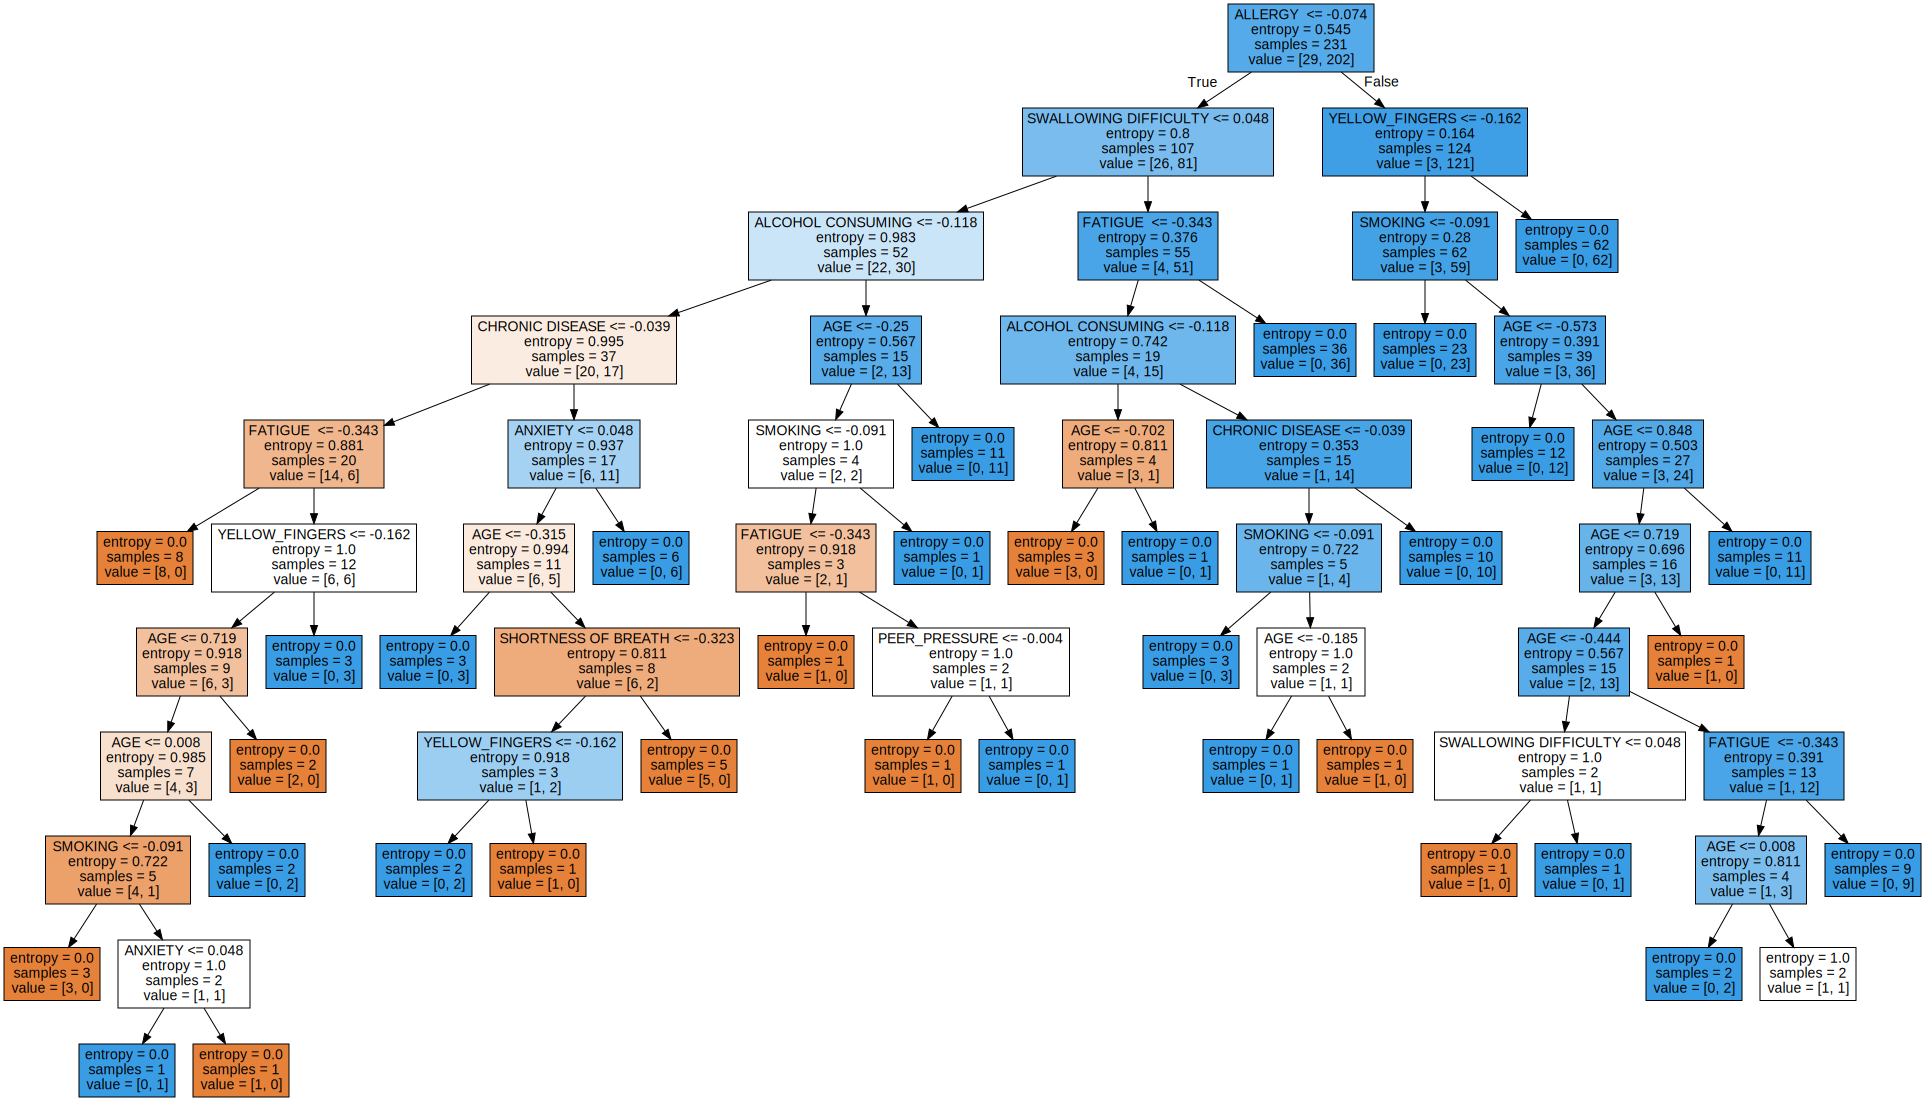

In [57]:
graphviz.Source(export_graphviz(a,feature_names=X.columns,filled=True))